In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("Info_Units_Results/Test_info_units.csv")

In [4]:
def url(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)
    return len(url)
df.loc[(df['text'].apply(url) > 0), 'info_units'] = 'code'

In [5]:
df['info_units'].value_counts()

results               845
model                 625
research-problem      318
experimental-setup    268
experiments           218
hyperparameters       167
ablation-analysis     132
baselines             111
code                   36
Name: info_units, dtype: int64

In [6]:
#df.loc[(df['labels'] == 'code'), 'info_units'] = df['labels']

In [7]:
df[df['pos1']<=10]['labels'].value_counts()

research-problem    261
code                  4
model                 4
Name: labels, dtype: int64

In [8]:
df[df['pos1']<=10]['info_units'].value_counts()

research-problem    254
model                 9
code                  4
experiments           2
Name: info_units, dtype: int64

In [9]:
df

,topic,paper_ID,main_heading,sub_heading,pos1,pos2,pos3,text,ofs1,ofs2,ofs3,labels,info_units
0,constituency_parsing,0,title,title,2,2,2,Recurrent Neural Network Grammars,0.008969,1.000000,1.000000,research-problem,research-problem
1,constituency_parsing,0,introduction,introduction,12,5,5,"In this paper , we introduce recurrent neural ...",0.053812,0.238095,0.238095,model,model
2,constituency_parsing,0,introduction,introduction,13,6,6,RNNGs operate via a recursive syntactic proces...,0.058296,0.285714,0.285714,model,model
3,constituency_parsing,0,introduction,introduction,15,8,8,"We give two variants of the algorithm , one fo...",0.067265,0.380952,0.380952,model,model
4,constituency_parsing,0,introduction,introduction,24,17,17,The discriminative model also lets us use ance...,0.107623,0.809524,0.809524,model,model
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,natural_language_inference,9,experiments,experiments,56,4,4,We trained the model by minimizing loss L from...,0.861538,0.400000,0.400000,experimental-setup,hyperparameters
2716,natural_language_inference,9,experiments,experiments,57,5,5,"As is common practice for BERT models , we onl...",0.876923,0.500000,0.500000,experimental-setup,hyperparameters
2717,natural_language_inference,9,experiments,experiments,58,6,6,Evaluation completed in about 5 hours on the N...,0.892308,0.600000,0.600000,experimental-setup,results
2718,natural_language_inference,9,experiments,experiments,60,8,8,Our BERT model for NQ performs dramatically be...,0.923077,0.800000,0.800000,results,results


In [10]:
label = df['labels']
predictions = df['info_units']
test_f1 = f1_score(label, predictions, average='micro')
print((f'Test F1 Score: {test_f1}'))

Test F1 Score: 0.7507352941176471


In [16]:
df = df[df['labels'] != 'dataset']

In [17]:
index = ['ablation-analysis', 'approach', 'baselines', 'code',  'experimental-setup', 'experiments', 
         'hyperparameters', 'model', 'research-problem', 'results']
label = df['labels']
predictions = df['info_units']
cm = confusion_matrix(label, predictions, normalize = 'true')
cm_df = pd.DataFrame(cm, index = index, columns = index)

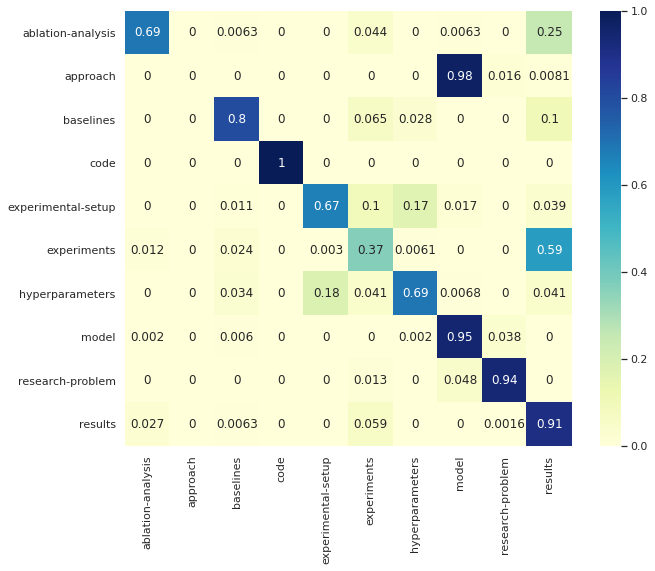

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
dataplot = sns.heatmap(cm_df, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [13]:
print(classification_report(label, predictions))

                    precision    recall  f1-score   support

 ablation-analysis       0.83      0.69      0.76       159
          approach       0.00      0.00      0.00       124
         baselines       0.77      0.80      0.79       107
              code       1.00      1.00      1.00        36
           dataset       0.00      0.00      0.00         8
experimental-setup       0.90      0.67      0.76       360
       experiments       0.55      0.37      0.44       328
   hyperparameters       0.60      0.69      0.65       146
             model       0.76      0.95      0.84       497
  research-problem       0.93      0.94      0.94       315
           results       0.69      0.91      0.78       640

          accuracy                           0.75      2720
         macro avg       0.64      0.64      0.63      2720
      weighted avg       0.72      0.75      0.72      2720



/home/ammaar/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
f1_score(label, predictions, average='macro')

0.632161339751079